In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18, 3)})

In [3]:
raw = pd.read_csv('cropMainData/ProductionCropsEAllDataNOFLAG.csv', encoding = "ISO-8859-1")

In [4]:
raw.fillna(0, inplace=True)
raw.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,0.0,0.0,0.0,...,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,0.0,0.0,0.0,...,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,0.0,0.0,0.0,...,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,0.0,0.0,0.0,...,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,0.0,0.0,0.0,...,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0


In [5]:
regions = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regionalDict = {}
for region in regions:
    regionalDict[region] = raw[raw['Area']==region]

In [6]:
world = regionalDict['World']
worldProductionTotal = world[world['Element Code'] == 5510].loc[:, 'Y1961':]
worldYieldTotal = world[world['Element Code'] == 5419].loc[:, 'Y1961':]
worldAreaHarvested = world[world['Element Code'] == 5312].loc[:, 'Y1961':]

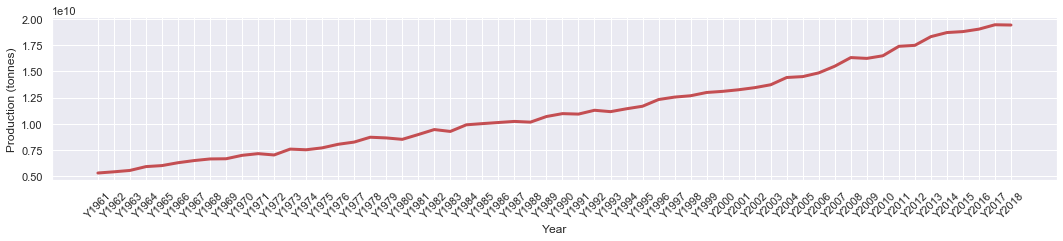

In [7]:
plt.xticks(rotation=45)
plt.plot(worldProductionTotal.sum(), label='Production', color='r', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.show()

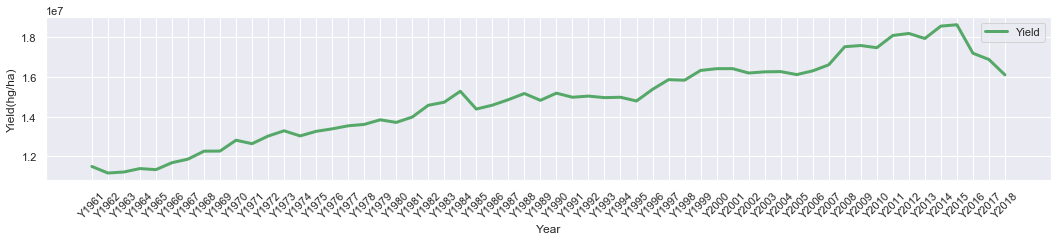

In [8]:
plt.xticks(rotation=45)
plt.plot(worldYieldTotal.sum(), label='Yield', color='g', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Yield(hg/ha)')
plt.legend()
plt.show()

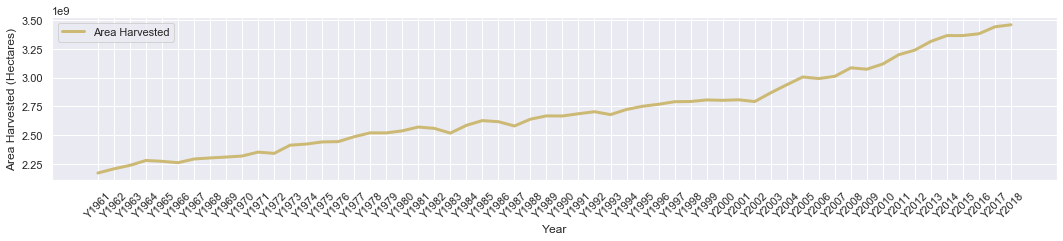

In [9]:
plt.xticks(rotation=45)
plt.plot(worldAreaHarvested.sum(), label='Area Harvested', color='y', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Area Harvested (Hectares)')
plt.legend()
plt.show()

The best performing on average seems to be: Cereals, Total


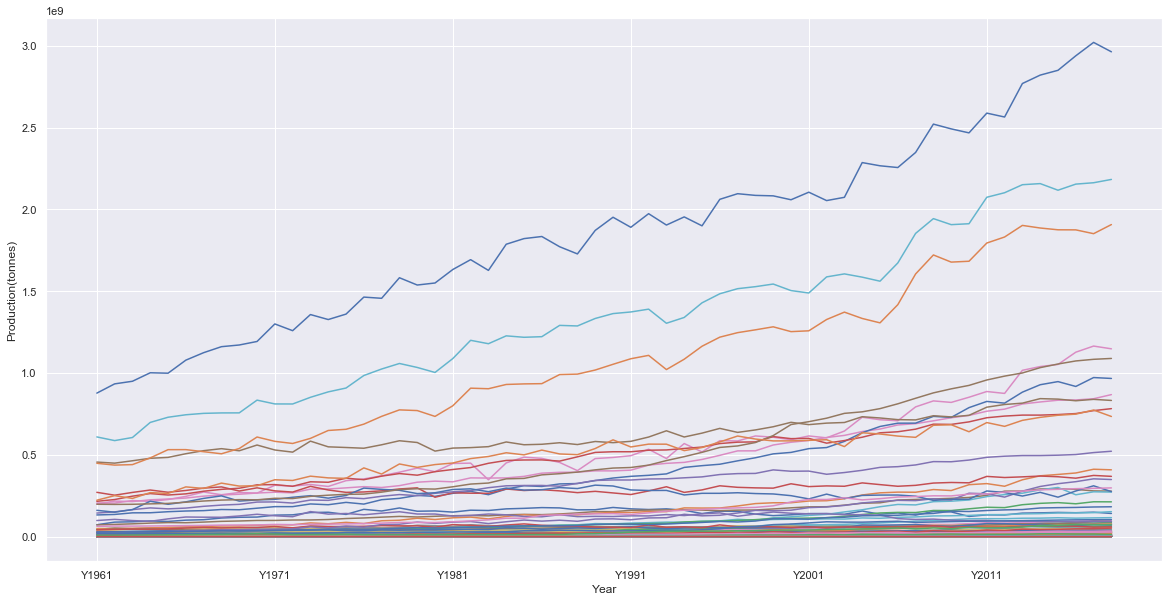

In [10]:
worldProduction = world[world['Element Code'] == 5510]
worldProductionByItem = worldProduction.groupby('Item').sum().loc[:, 'Y1961':]
# worldProductionByItem.iloc[0].plot()
for i in range(1, len(worldProductionByItem)):
    ax = worldProductionByItem.iloc[i].plot(figsize=(20, 10), label=worldProductionByItem.index[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Production(tonnes)')
print('The best performing on average seems to be: ' + worldProductionByItem.T.mean().idxmax())

## What is the correlation between climate change and crop production in countries that rank in the top 3 in Climate Risk Indexes? 

These are the countries with notably high climate risk indexes and we will be observing the ones at the top.

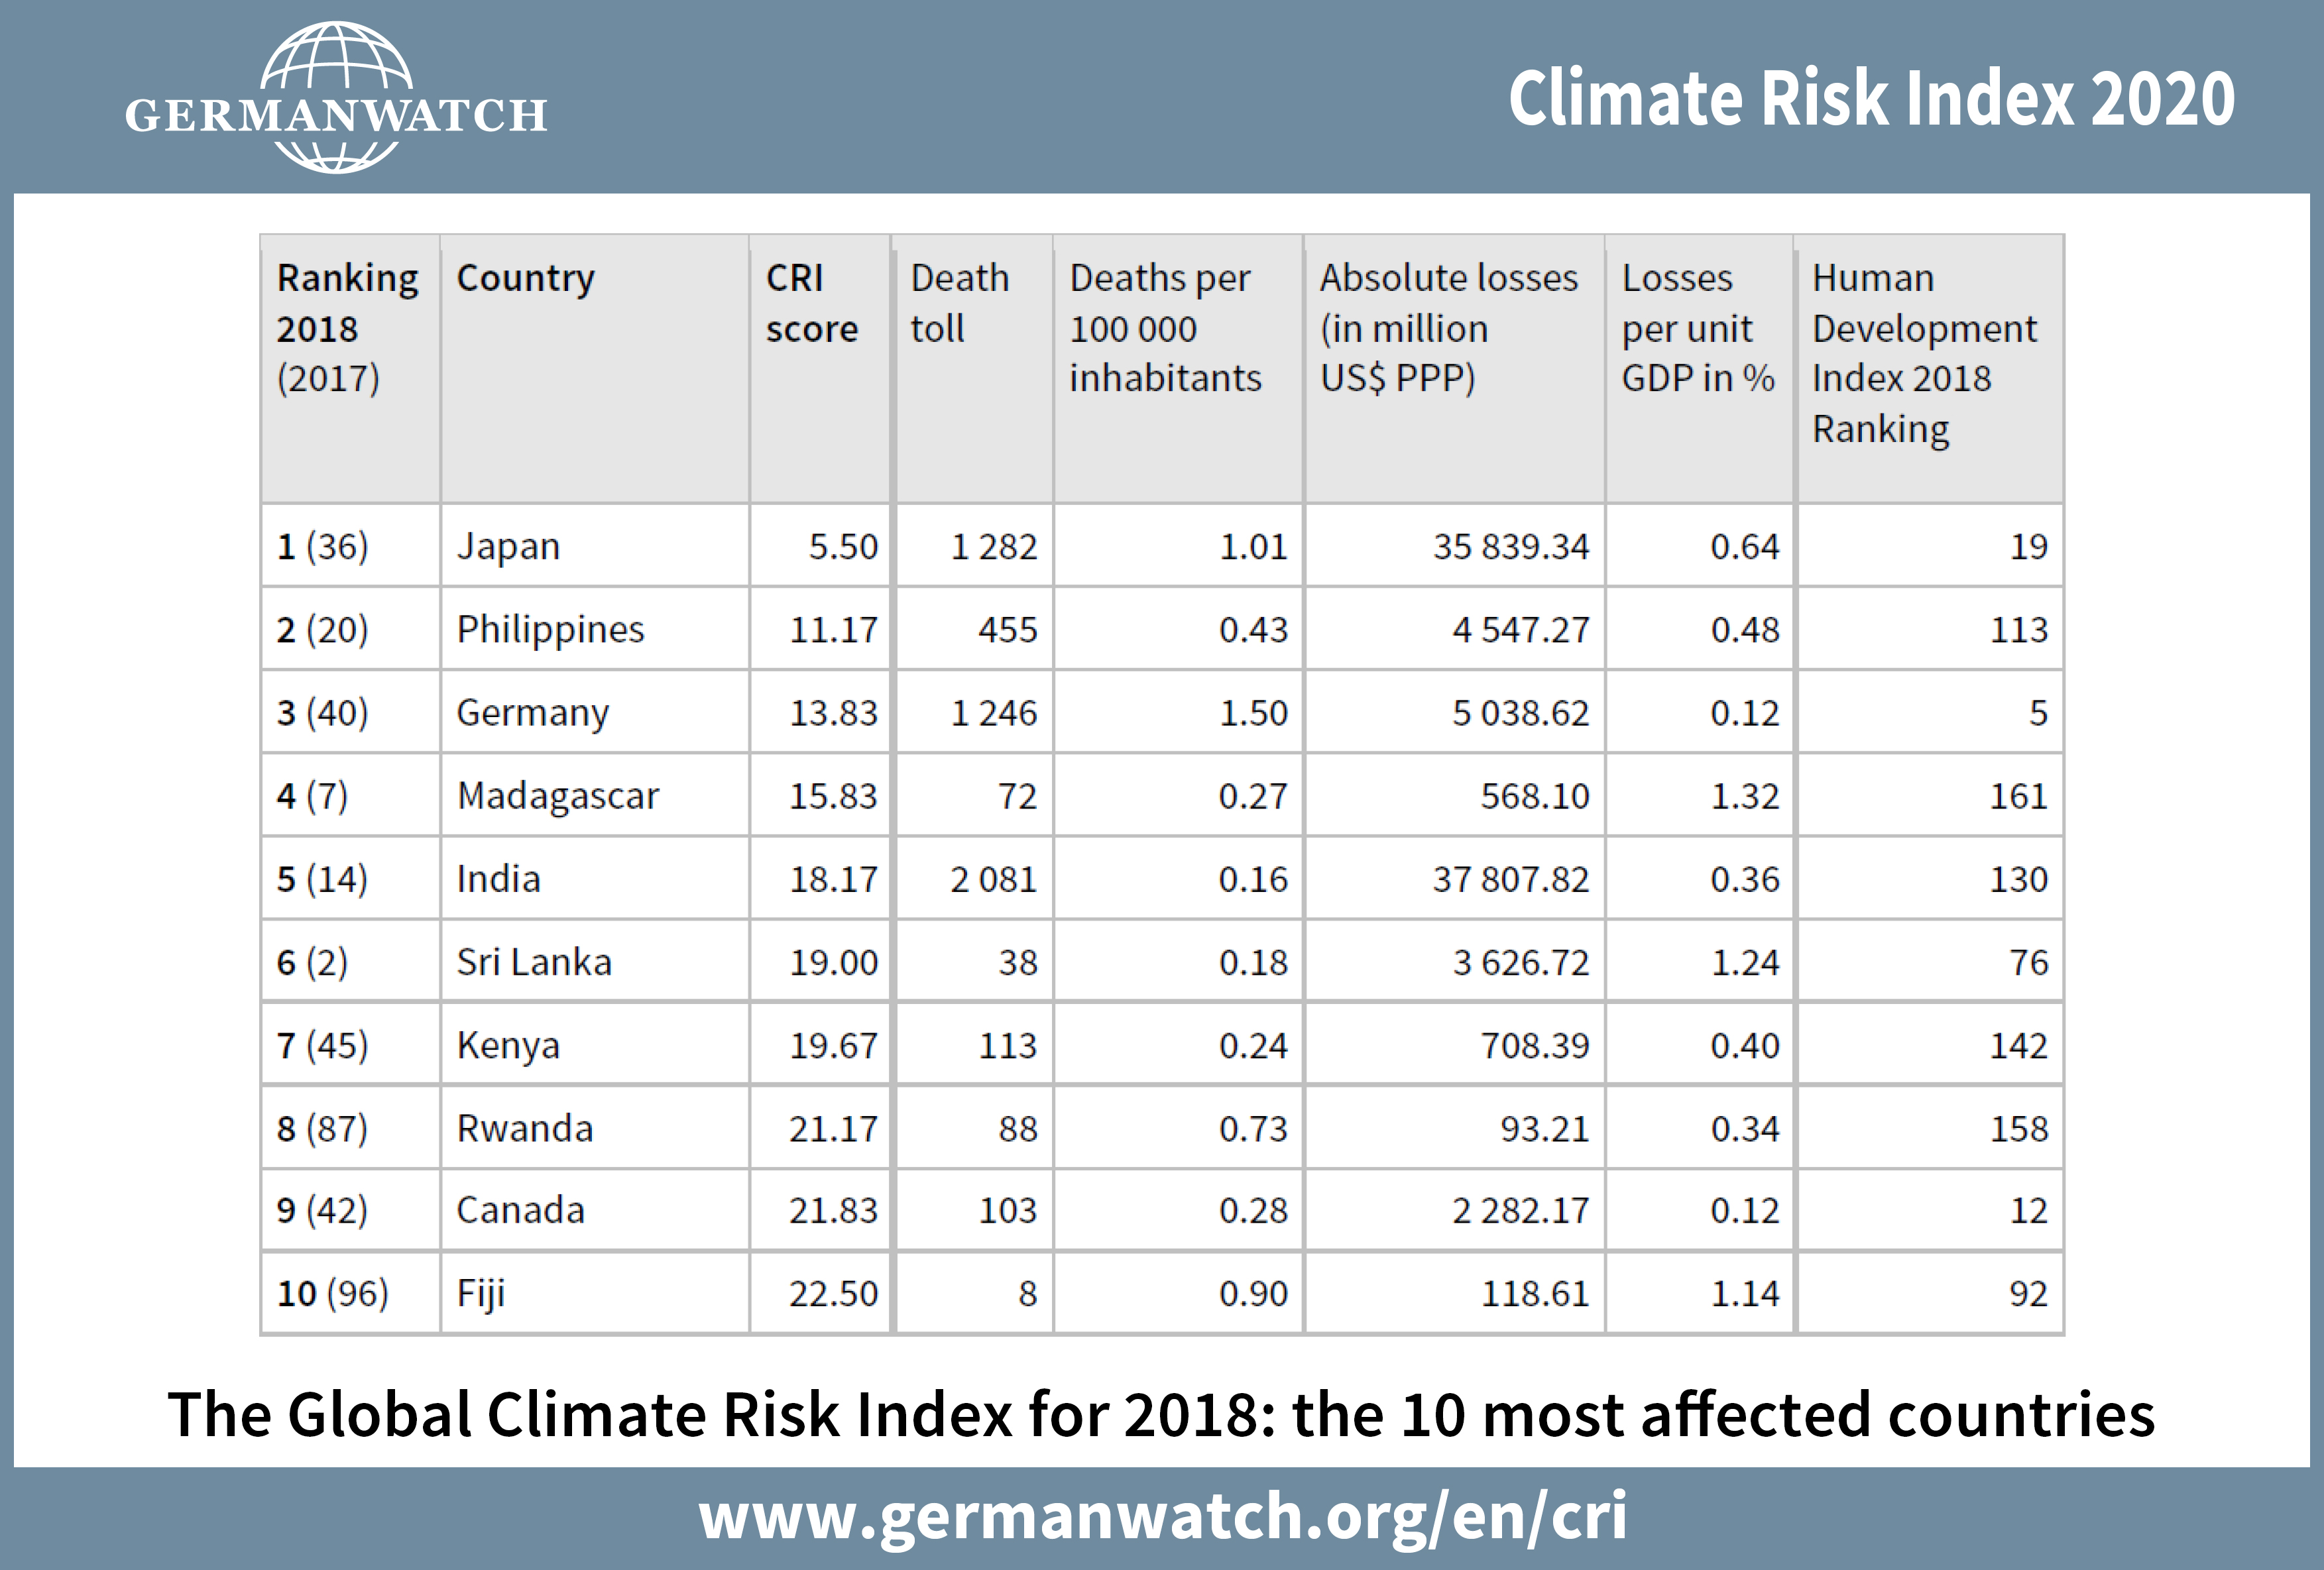

### In countries with a High Climate Risk Index, what is the correlation and does correlation actually imply causation?

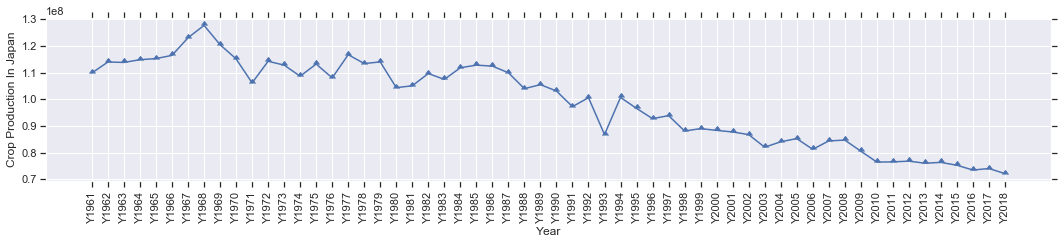

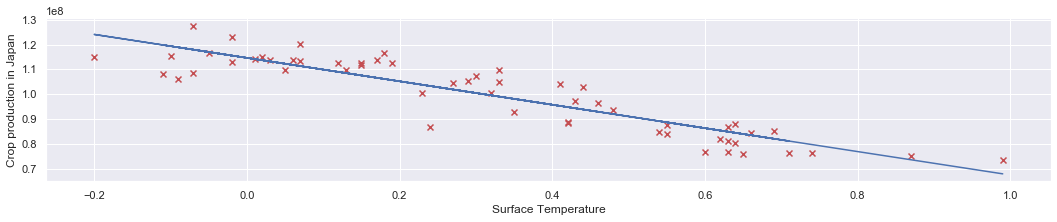

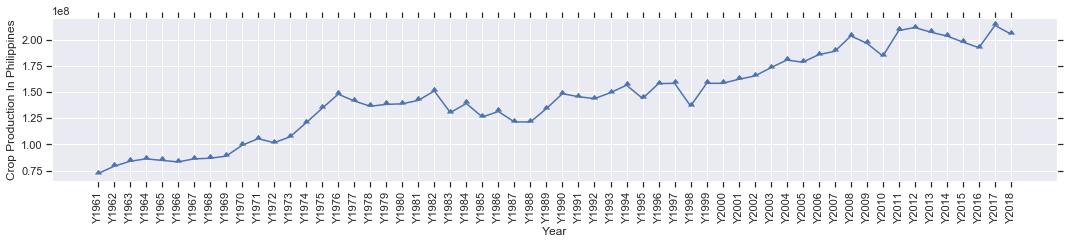

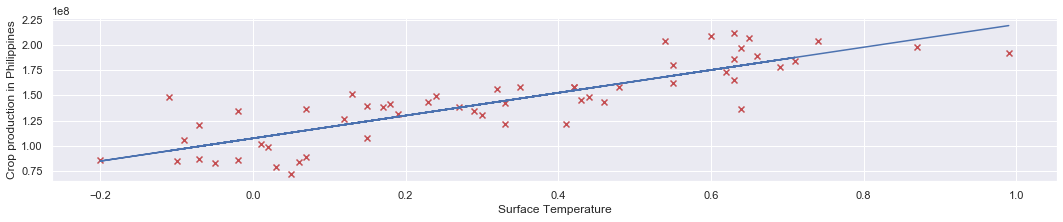

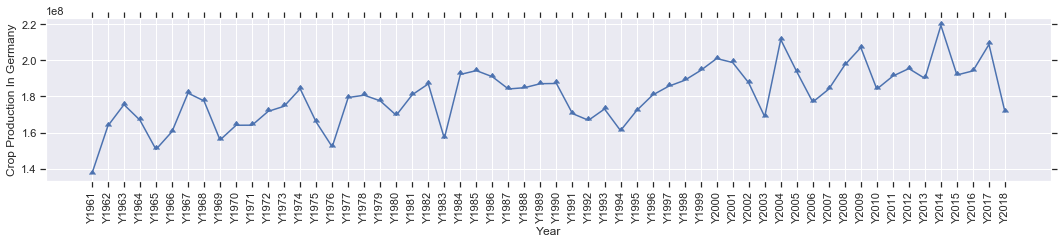

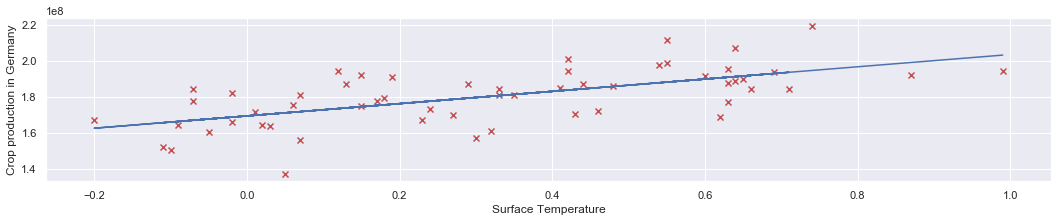

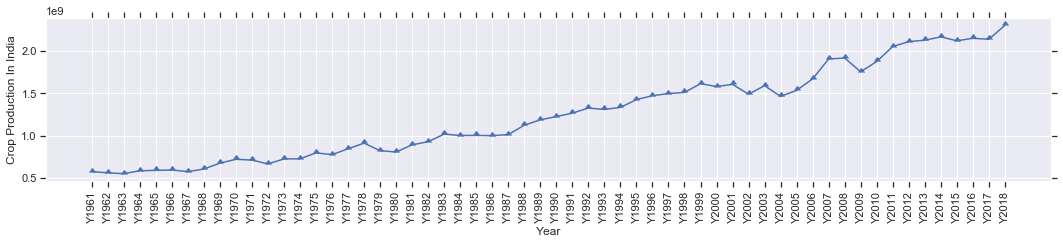

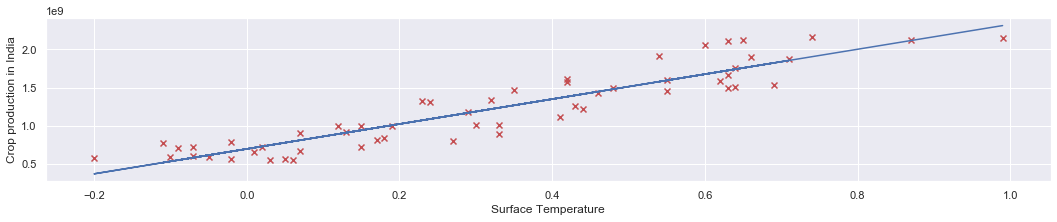

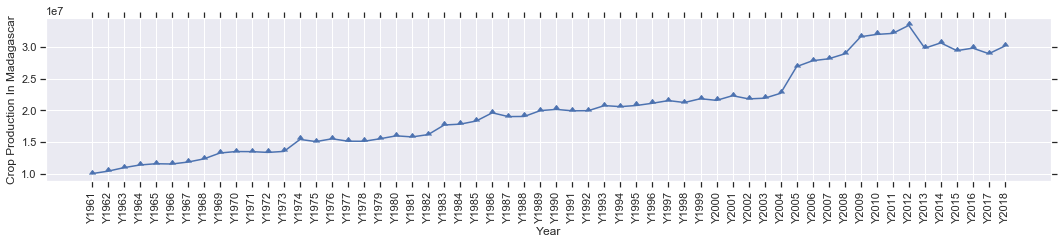

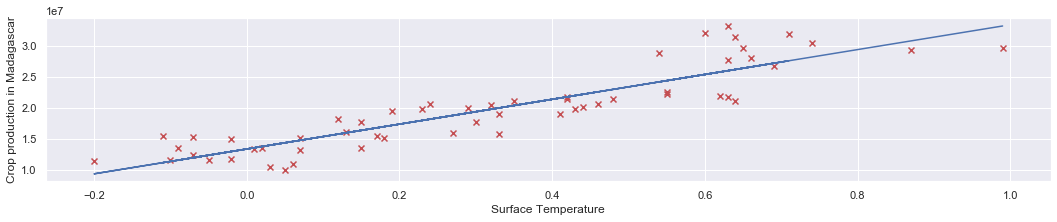

In [11]:
climate = pd.read_csv('climate/annual_csv.csv')
surfaceTemp = pd.DataFrame(climate[np.logical_and(climate['Source']=='GISTEMP', climate['Year']>=1961)].sort_values(by=['Year']))
surfaceTemp.rename({"Mean": "SurfaceTemp"}, inplace=True)
surfaceTemp['Year'] = pd.to_numeric(surfaceTemp['Year'])
surfaceTemp.drop(['Source'], axis=1, inplace=True)
surfaceTemp.set_index('Year', inplace=True)

HighCRICountries = ['Japan', 'Philippines', 'Germany', 'India', 'Madagascar']

for country in HighCRICountries:
    AreaAggregated = raw[raw['Area']==country]
    AreaProductionYearly = AreaAggregated[AreaAggregated['Element Code']==5510].loc[:,'Y1961':].sum()
    plt.plot(AreaProductionYearly, marker=10)
    plt.xlabel('Year')
    plt.ylabel('Crop Production In ' + country)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', 
    labelbottom='on')
    plt.xticks(rotation=90)
    plt.show()

    areaFormatted = pd.DataFrame()
    count = 0
    for year, value in AreaProductionYearly.iteritems():
        areaFormatted.loc[count, 'Year'] = year
        areaFormatted.loc[count, 'Total'] = value
        count += 1
    areaFormatted['Year'] = areaFormatted['Year'].apply(lambda x: x[1:])
    areaFormatted['Year'] = pd.to_numeric(areaFormatted['Year'])

    areaMerged = areaFormatted.merge(surfaceTemp, on='Year')
    areaMerged.set_index('Year', inplace=True)

    plt.scatter(areaMerged['Mean'], areaMerged['Total'], marker='x', cmap='viridis_r', color='r')
    plt.xlabel('Surface Temperature')
    plt.ylabel('Crop production in ' + country)

    x = np.array(areaMerged['Mean'])
    y = np.array(areaMerged['Total'])
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.show()

For Japan, the overall correlation is negative. But for other countries who have faced the impact of climate change, there is a weak to moderate positive correlation. Because of this, we can perhaps say, that the impact is not too apparent or there are other factors that need to be taken into account (industrial development, nature of crops grown, etc.), geographical position on the map and more.

In [12]:
# x-axis: Continent, y-axis: Production Percentage
        
        
# fig, ax = plt.subplots()
# for row, data in worldProductionByItem.iterrows():
#     ax.plot(data)
#     print(row)
#     print(data)

# fig, axes = plt.subplots(200,200, figsize=(15,5))
# for (year, group), ax in zip(worldProductionByItem, axes.flatten()):
#     group.plot(x='brent', y='sp500', kind='scatter', ax=ax, title=year)
    
# fig, ax = plt.subplots()
# axes = worldProductionByItem.iloc[0:3].plot(marker='.', linestyle='None', figsize=(10, 10), subplots=True)
# for ax in axes:
#     ax.set_ylabel('Production Total')


# japanAggregated = raw[raw['Area']=='Japan']
# japanProductionYearly = japanAggregated[japanAggregated['Element Code']==5510].loc[:,'Y1961':].sum()
# plt.plot(japanProductionYearly, marker=10)
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', 
# labelbottom='on')
# plt.xticks(rotation=90)
# plt.show()

# Studying Caffeine

1. What are the biggest sources of caffeine?

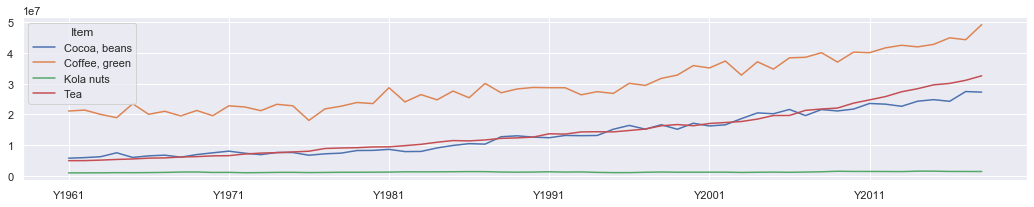

In [13]:
caffeineProduction = raw[raw['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineProduction = caffeineProduction[caffeineProduction['Element Code'] == 5510]
caffeineProduction.groupby('Item').sum().loc[:,'Y1961':].T.plot()

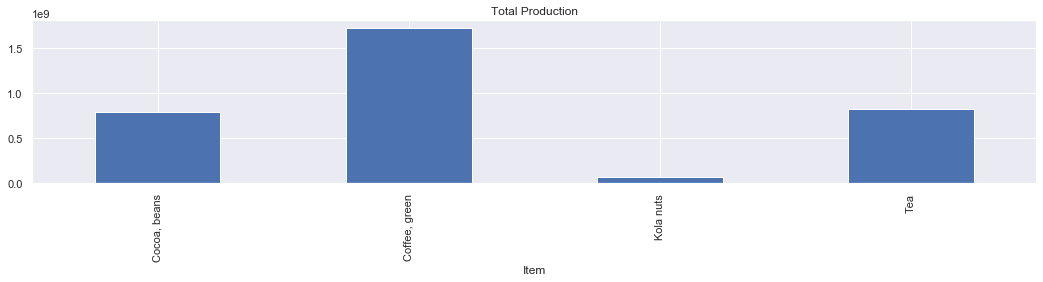

In [14]:
# Total production over the years
caffeineProduction.groupby('Item').sum().loc[:,'Y1961':].T.sum().plot.bar()
plt.title('Total Production')
plt.show()

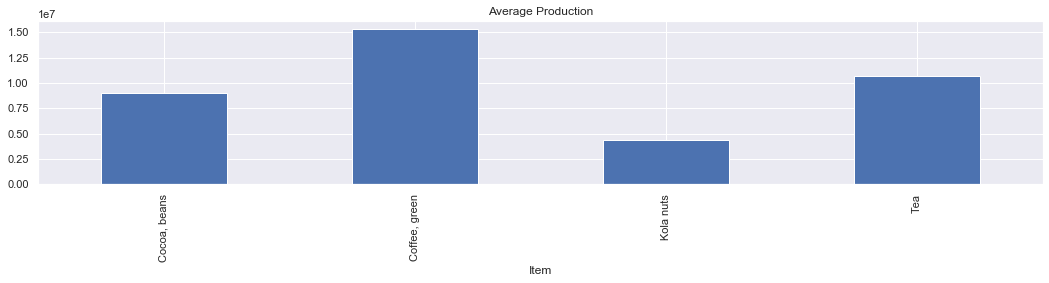

In [15]:
caffeineProduction.groupby('Item').mean().loc[:,'Y1961':].T.sum().plot.bar()
plt.title('Average Production')
plt.show()

2. Which regions produce the most caffeine-based crops?

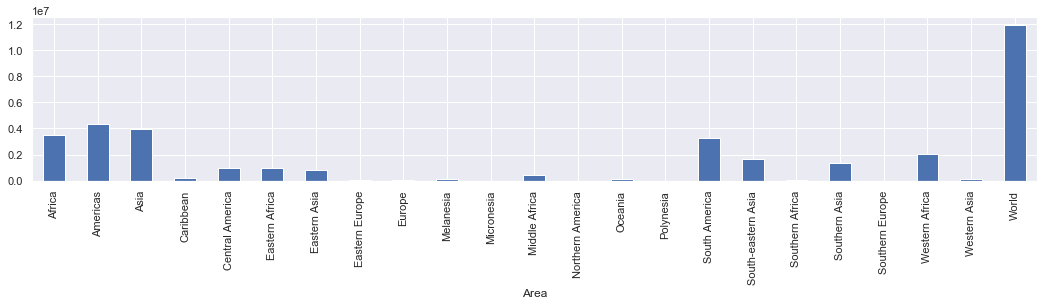

In [16]:
regions = list(regionalDict.keys())
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(regions)]
regionsProduction = regionsOnly[regionsOnly['Element Code'] == 5510]
regionsOnly.groupby('Area').sum().loc[:, 'Y1961':].T.mean().plot.bar()